# Exploring Movie Data
---
Timothy Helton

Exploring and visualizing movie data scraped from Box Office Mojo. Make sure to format your plots properly with axis labels and graph titles at the very least.

---
<br>
<font color="red">
    NOTE:
    <br>
    This notebook uses code found in the
    <a href="https://github.com/TimothyHelton/k2datascience/blob/master/k2datascience/movies.py">
    <strong>k2datascience.movies</strong></a> module.
    To execute all the cells do one of the following items:
    <ul>
        <li>Install the k2datascience package to the active Python interpreter.</li>
        <li>Add k2datascience/k2datascience to the PYTHON_PATH system variable.</li>
        <li>Create a link to the movies.py file in the same directory as this notebook.</li>
</font>

---
### Imports

In [1]:
from k2datascience import movies

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

### Data Prep
 
Load the dataset and explore its contents, columns and types. Convert any date columns from string to Python's datetime.

In [2]:
mov = movies.BoxOffice()
print(f'Data Types:\n{mov.data.dtypes}\n\n')
print(f'Data Shape:\n{mov.data.shape}\n\n')
print(f'Missing Data:\n{mov.data.isnull().sum()}\n\n')
mov.data.head()
mov.data.tail()
mov.data.describe()

Data Types:
title                     object
budget                   float64
domestic_gross             int64
director                  object
rating                    object
runtime                    int64
release_date      datetime64[ns]
dtype: object


Data Shape:
(400, 7)


Missing Data:
title              0
budget            53
domestic_gross     0
director          60
rating             0
runtime            0
release_date       0
dtype: int64




,title,budget,domestic_gross,director,rating,runtime,release_date
83,Texas Chainsaw 3D,NaN,34341945,John Luessenhop,R,92,2013-01-04
76,A Haunted House,2500000.0,40041683,Michael Tiddes,R,80,2013-01-11
70,Gangster Squad,60000000.0,46000903,Ruben Fleischer,R,113,2013-01-11
46,Mama,15000000.0,71628180,Andres Muschietti,PG-13,100,2013-01-18
63,Hansel and Gretel: Witch Hunters,50000000.0,55703475,Tommy Wirkola,R,88,2013-01-25


,title,budget,domestic_gross,director,rating,runtime,release_date
309,Sing,75000000.0,268744865,Garth Jennings,PG,110,2016-12-21
385,Patriots Day,45000000.0,31886361,Peter Berg,R,130,2016-12-21
362,Assassin's Creed,125000000.0,54647948,NaN,PG-13,140,2016-12-21
353,Why Him?,38000000.0,60191438,NaN,R,111,2016-12-23
313,Hidden Figures,25000000.0,162861188,Theodore Melfi,PG,127,2016-12-25


,budget,domestic_gross,runtime
count,3.470000e+02,4.000000e+02,400.000000
mean,6.934669e+07,1.008192e+08,112.390000
std,5.935362e+07,1.014442e+08,17.253612
min,1.000000e+05,2.106712e+07,75.000000
25%,2.500000e+07,4.008397e+07,100.000000
50%,5.000000e+07,6.446666e+07,111.000000
75%,1.050000e+08,1.204759e+08,123.000000
max,2.500000e+08,9.366622e+08,180.000000


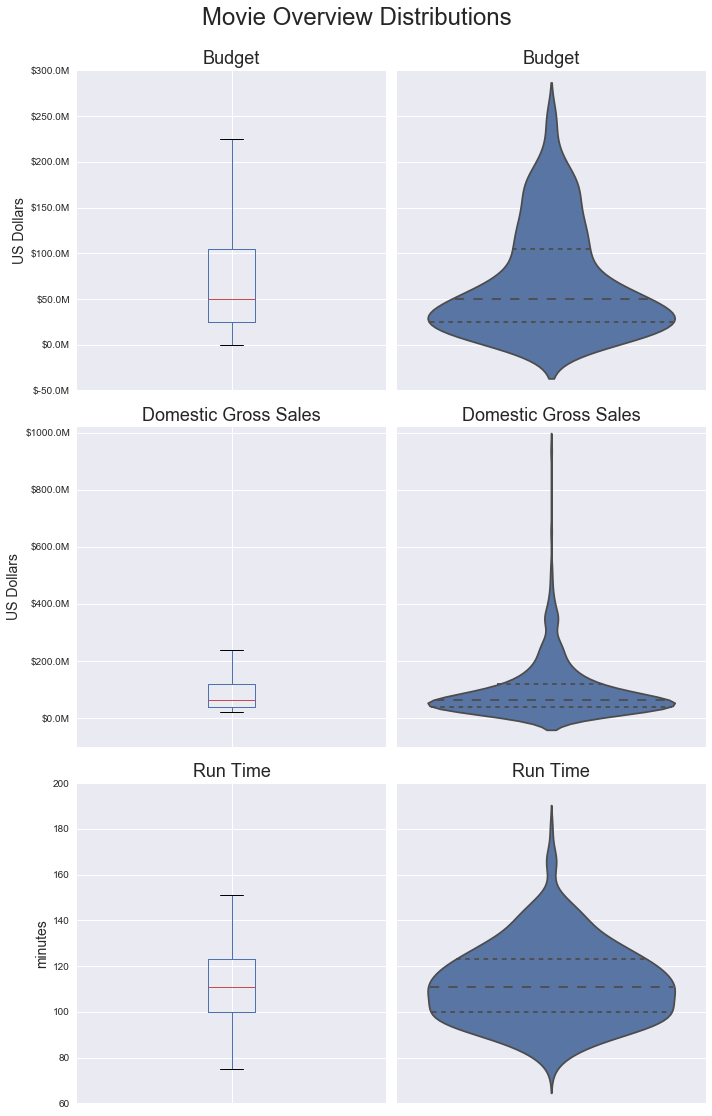

In [3]:
mov.distribution_plot()

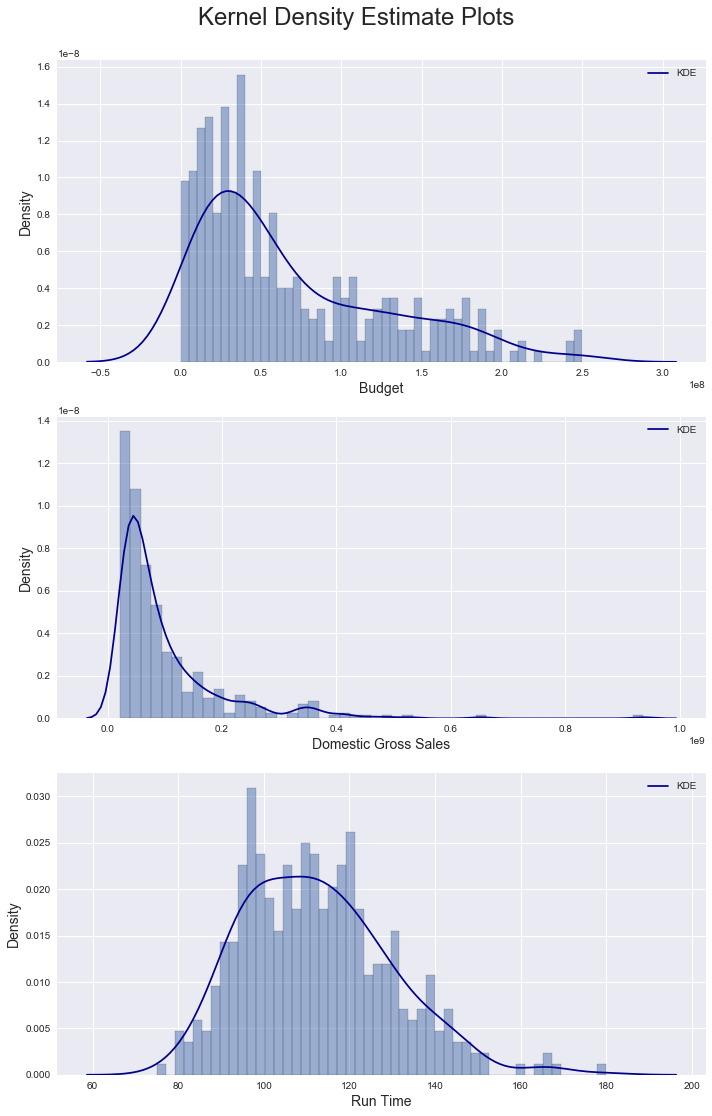

In [4]:
mov.kde_plot()

### Exercise 1 
 
Plot the Domestic Total Gross by Release Date. Try a scatterplot and a line plot. In what scale are the numbers on the Y axis?

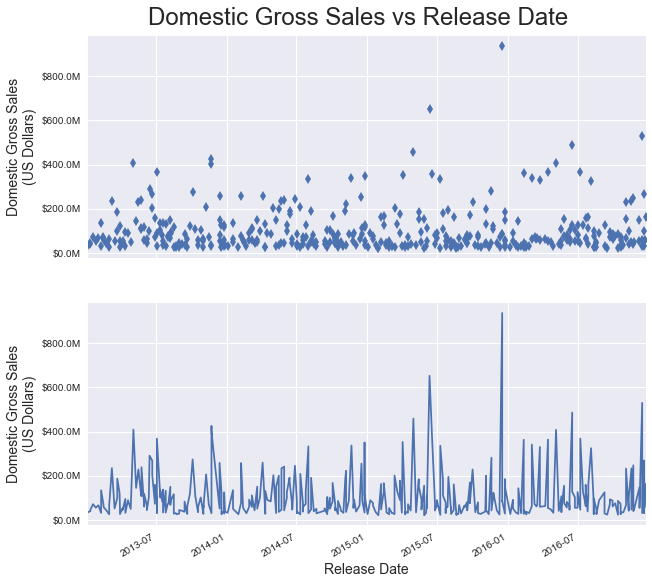

In [5]:
mov.domestic_gross_vs_release_date_plot()

#### Y-Axis Labels
The y-axis labels are scaled to millions of dollars.

### Exercise 2

Plot the Domestic Total Gross by Runtime. Plot Runtime vs Release Date.  Try a scatterplot and a line plot. What are the benefits and liabilities of each type of plot in this case?

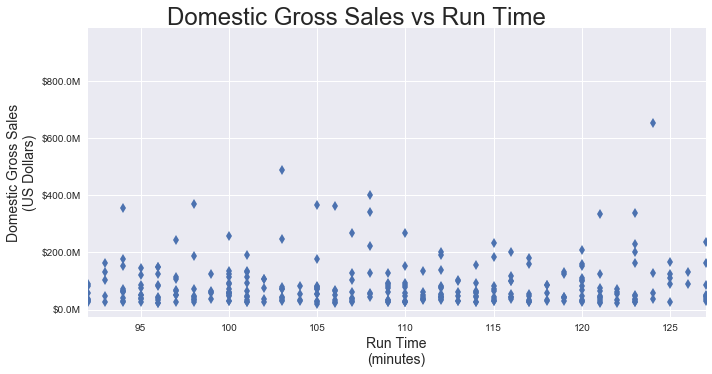

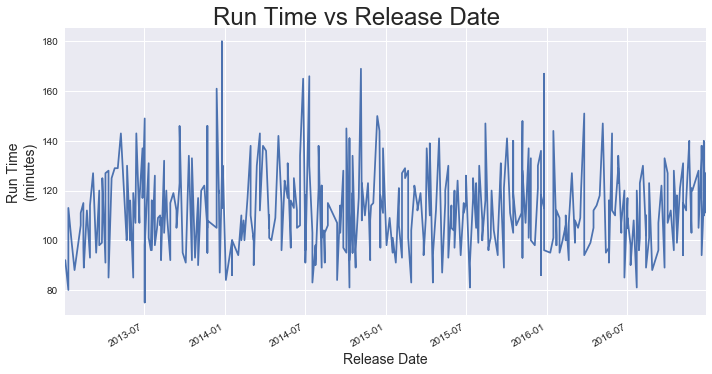

In [6]:
mov.domestic_gross_vs_runtime_plot()
mov.runtime_vs_release_plot()

#### Benefits and Liabilities
1. The scatter plot clearly bins the data allowing one to observe the counts of movies at a given run time and the corresponding sales.
1. The line plot is harder to gain insight.
    - The overall majority of run times reside beween 100-120 minutes in length and there is not a trend over time that the run times are increasing or decreasing.

### Exercise 3

The Motion Picture Association of America (MPAA) rating system comprises of G (general audiences: all ages admitted), PG (parental guidance suggested: may not be suitable for children), PG-13 (parents stronly cautioned: may be inappropriate for children under 13), and R (restricted: under 17 requires accompanying parent or adult guardian). Find the average Runtime and Domestic Total Gross at each Rating Level. Plot both by Rating. Do you see any pattern in the data?

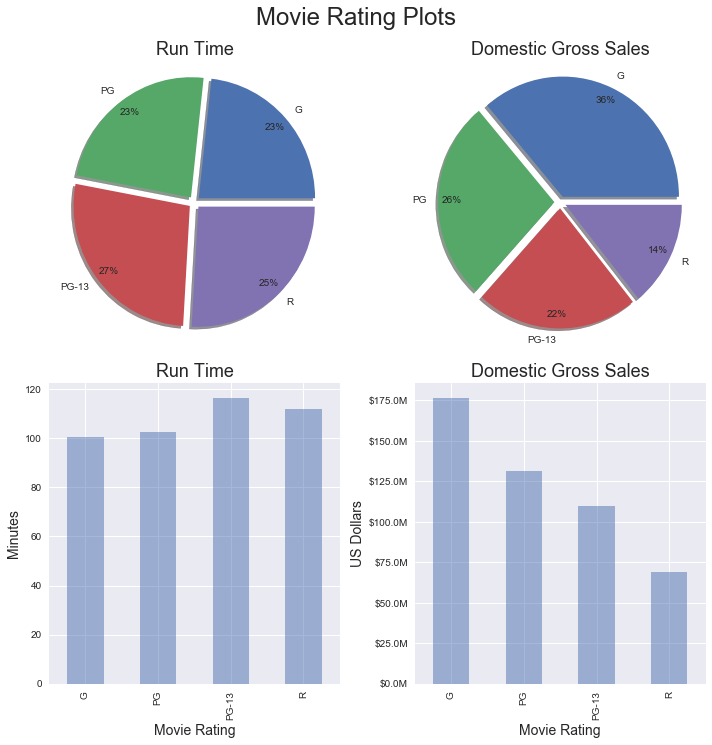

,runtime,domestic_gross
rating,,
G,100.333333,1.767365e+08
PG,102.605634,1.315539e+08
PG-13,116.551546,1.098403e+08
R,111.810606,6.930405e+07


In [7]:
mov.rating_plot()

#### Findings
1. Movies marketed towards adults are on average 10-15% longer than those for younger audiences.
2. Movies marketed towards younger audiences are far more likely to produce larger domestic gross sales.

### Exercise 4

Plot the Domestic Total Gross by the Release Date. Segment by Rating - that is, have all 4 groups on the same plot. Can you spot anything out of the ordinary? Now make 4 separate plots (one for each Rating) but part of the same matplotlib figure. What are the benefits and liabilities of each approach?

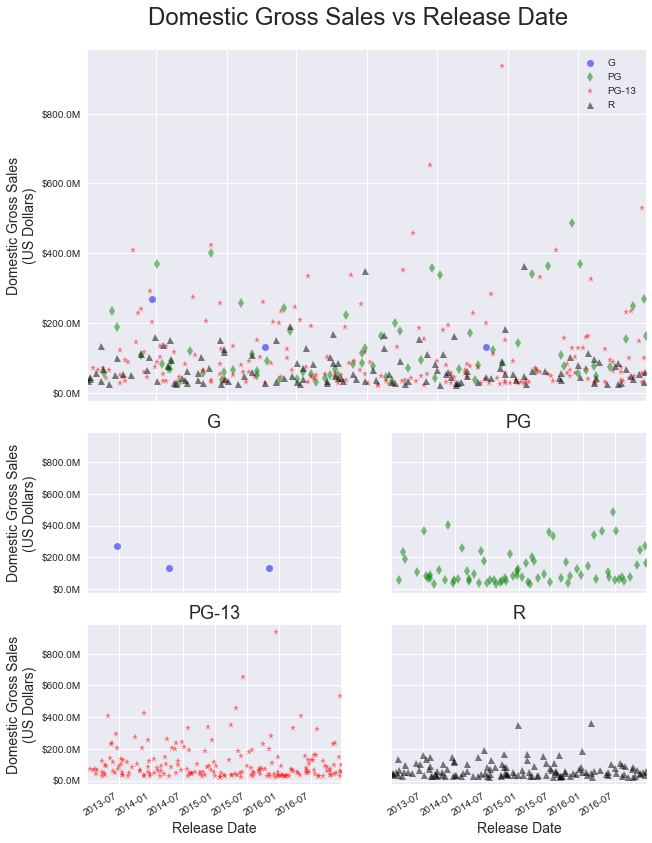

In [8]:
mov.domestic_gross_rating_plot()

#### Findings
1. The combined plot makes details of most of the data difficult to interpret, but highlights the points that are above average.
1. The segregated plots require the scales to be set equal on each plot to facilitate a comparision.
1. By combining all these plots together a composite view of the data is formed resulting in insight.

### Exercise 5

Who are the top 10 directors with the highest gross per movie (highest average gross)? How many movies did they release in that time period? Who are the top 10 directors with the highest average gross excluding one-hit wonders (directors that have a single release in the dataset)?

In [9]:
directors = mov.director_performance()
print('Top 10 Directors')
directors.head(10)

print('Top 10 Directors with more than one release')
directors.query('qty > 1').head(10)

Top 10 Directors


,domestic_gross,qty
director,,
J.J. Abrams,1165440886,2
Francis Lawrence,1043527834,3
Gareth Edwards,730794116,2
James Wan,676463616,4
"Anthony Russo, Joe Russo",667850921,2
Colin Trevorrow,652270625,1
Zack Snyder,621405712,2
Clint Eastwood,522243418,3
Peter Jackson,513486643,2


Top 10 Directors with more than one release


,domestic_gross,qty
director,,
J.J. Abrams,1165440886,2
Francis Lawrence,1043527834,3
Gareth Edwards,730794116,2
James Wan,676463616,4
"Anthony Russo, Joe Russo",667850921,2
Zack Snyder,621405712,2
Clint Eastwood,522243418,3
Peter Jackson,513486643,2
Bryan Singer,454551626,3


### Exercise 6

Group the movies by month of release and plot the mean Domestic Total Gross by month. Calculate the Standard Error and add error bars to the plot. Can you tell any pattern from the data?

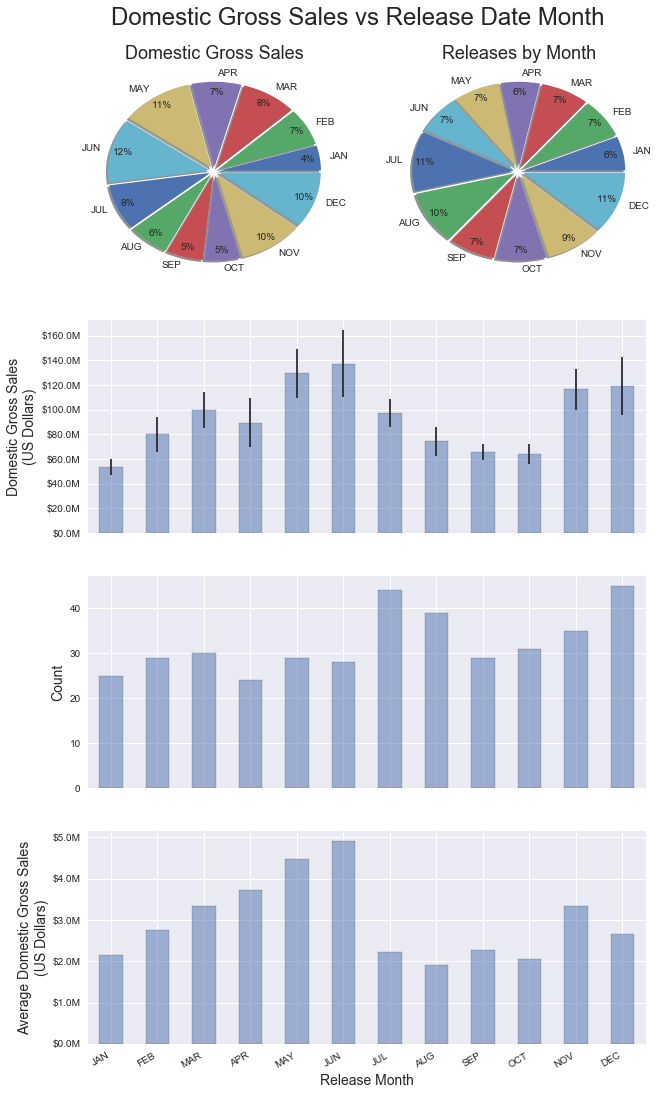

,domestic_gross_mean,std_error,month_release,avg_gross
release_date,,,,
JAN,5.359777e+07,6.551741e+06,25,2.143911e+06
FEB,8.009402e+07,1.411892e+07,29,2.761863e+06
MAR,9.996924e+07,1.461666e+07,30,3.332308e+06
APR,8.943314e+07,1.968123e+07,24,3.726381e+06
MAY,1.296064e+08,1.979015e+07,29,4.469186e+06
JUN,1.374377e+08,2.695037e+07,28,4.908490e+06
JUL,9.747506e+07,1.112324e+07,44,2.215342e+06
AUG,7.428030e+07,1.152599e+07,39,1.904623e+06
SEP,6.572232e+07,6.426486e+06,29,2.266287e+06


In [10]:
mov.domestic_gross_vs_months()

####  Findings
1. The peak periods for average domestic gross sales are summer (May, June).
2. The holiday season (November, December) appears to be a time for promissing time for releasing a movie, but upon further investigation the market is saturated.